# Iris Neural Network

## Introduction

Artifical Neural Networks are quickly becoming one of the most popular and widely used mechanisms in Machine Learning and Data Analysis. In the last number of years, numerous libraries and software has been developed to equip programmers with a set of tools for modeling and analysing data in order to recognise patterns and make predictions using large data sets. In today's age of [Big Data](https://en.wikipedia.org/wiki/Big_data) it is important to try make sense of all of the data we have in society. This could range from social media pattern recognitions from anything to finance and economic trends. The reality is that today we have more data in existence than ever before and it growing at a vast and exponential rate.

Artifical Neural Networks aim to mimic and replicate the neurons of a human brain and using the power of the complex mathematical functions allow us to process and model data in such a way that we can form rational assumptions on a given data set.

Given the sheer amount of data out there it is important to note that data we may analyse is often subject to human error and may not always hold a valid essense of truth. For the purpose of this example we will take a look at the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris).



Throughout the notebook we aim to build an Artifical Neural Network capable of making predictions of species of Iris Flowers using [Keras](https://keras.io) - Keras is a high-level neural networks API, written in Python and capable of running on top of [Tensorflow](https://www.tensorflow.org/).

So without further ado, lets get started!

## Importing the data set

In [2]:


# imports and preliminaries
import csv
import numpy as np
import keras as kr

# Load the Iris dataset.
iris = list(csv.reader(open('/content/drive/MyDrive/all ml/iris-data-set.csv')))[1:]

In [3]:
iris

[['5.1', '3.5', '1.4', '0.2', 'setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'setosa'],
 ['4.6', '3.6', '1.0', '0.2', 'setosa'],
 ['5.1', '3.3', '1.7', '0.5', 'setosa'],
 ['4.8', '3.4', 

## Inputs and Outputs
### Data Investigation and Classification

Before trying to create a model for our Neural Network we first need to investigate our data and determine what will be the inputs and what will be our outputs. The CSV file provided contains 5 columns with:

- Sepal Length
- Sepal Width
- Petal Length
- Petal Width
- Species

Judging by the fact that we are trying to make predictions we must split our data set into sets of:

- Inputs - Numerical data values
- Outputs - Classification of Iris Flower species


Now that we have the data set loaded we can extract the data we need into appropriate data sets in preparation for training and testing our Model.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# The inputs are four floats: sepal length, sepal width, petal length, petal width.
inputs  = np.array(iris)[:,:4].astype(np.float32)

# Outputs are initially individual strings: setosa, versicolor or virginica.
outputs = np.array(iris)[:,4]

# Convert the output strings to ints.
outputs_vals, outputs_ints = np.unique(outputs, return_inverse=True)

## Categorical Classification

Here we are using the Keras utility `to_categorical()` to allow us to turn our output categories into binary class matrices. This is often refered to as "One-Hot" encoding. This is for use with categorical_crossentropy and classification of our species (setosa, versicolor and virginica).

Each Species will be represented as a binary class matrix.

- Setosa [1 0 0]
- Versicolor [0 1 0]
- Virginica [0 0 1]

In [6]:
# Encode the category integers as binary categorical vairables.
outputs_cats = kr.utils.to_categorical(outputs_ints)

## Divide & Conquer
### Splitting the data

We can now randomly split the data into two sets for:

- Training
- Testing

In [7]:
# Split the input and output data sets into training and test subsets.
inds = np.random.permutation(len(inputs))
train_inds, test_inds = np.array_split(inds, 2)
inputs_train, outputs_train = inputs[train_inds], outputs_cats[train_inds]
inputs_test,  outputs_test  = inputs[test_inds],  outputs_cats[test_inds]

In [8]:
from google.colab import files
from IPython.display import Image # Changed 'image' to 'Image' to import the class correctly

# Creating a Model
Below we can see an example of a how a Neural Network can be visualized. Every Neural Network is made up of these three main consituents.

.Input Layer
.xnumber of Hidden Layers
.Output Lay
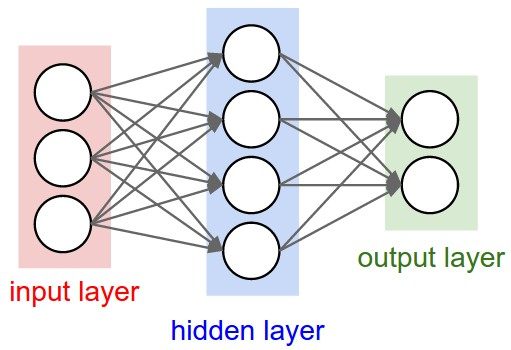)



# Keras Models
Keras offers a very useful and high level API to handle creation of Neural Networks. The Keras Sequential Model is defined as a linear stack of layers. This is perfect for what we need to create an Artificial Neural Network consisting of Input, Output and Hidden nodes. We define our Model and add the layers to it.

We are trying to create a model that will look somewhat similar to below:
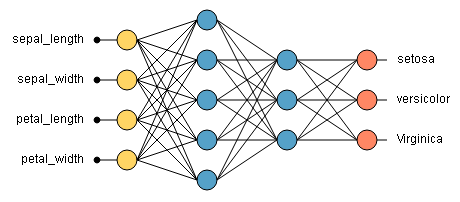

In [12]:
# Create a neural network.
model = kr.models.Sequential()

# Add an initial layer with 4 input nodes, and a hidden layer with 16 nodes.
model.add(kr.layers.Dense(16, input_shape=(4,)))
# Apply the sigmoid activation function to that layer.
model.add(kr.layers.Activation("sigmoid"))
# Add another layer, connected to the layer with 16 nodes, containing three output nodes.
model.add(kr.layers.Dense(3))
# Use the softmax activation function there.
model.add(kr.layers.Activation("softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Activation Functions
An Activation Function in a Neural Network defines the output of a given node given its input or set of inputs. Above we applying two activation functions in separate layers.



# Sigmoid
A sigmoid function is a mathematical function having an "S" shaped curve (sigmoid curve). Often, sigmoid function refers to the special case of the logistic function shown in the first figure and defined by the formula:
sigmoid.svg

above we see a plot of the "S" shaped curved or "Sigmoid Curve".
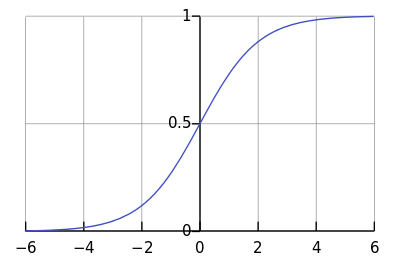


It's usage in neural network are:

Activation function that transform linear inputs to nonlinear outputs.
Bound output to between 0 and 1 so that it can be interpreted as a probability.
Make computation easier than arbitrary activation functions.
softmax.svg




### Softmax


Softmax regression is defined by the mathematical formula:



Here are using Softmax to allow us to let our data flow through the hidden layers and essentially end up as one of our defined classes:

- Setosa
- Versicolor
- Virginica


In [16]:
# Display our Model using the summary function
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

## Configure the Model for training and fit the training data

We configure the Model using the `compile()` function defined in the [Keras Model API](https://keras.io/models/model/).
We define an Optimizer, a Loss function and an additional metric - accuracy.

So before we can use our Model for we must first train it. Using the training data subset which we extracted before we can now fit it to our Model.

The goal here is for the Optimizer to essentially minimize the Loss.

We fit the model passing our inputs and our expected outputs and train it across 100 "Epochs" or training cycles. On each iteration we improve the improve the accuracy and miniize the loss.

In [17]:
# # Configure the model for training.
# # Uses the adam optimizer and categorical cross entropy as the loss function.
# # Add in some extra metrics - accuracy being the only one.
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# # Fit the model using our training data.
# model.fit(inputs_train, outputs_train, epochs=100, batch_size=1, verbose=1)



# Configure the model for training.
# Uses the adam optimizer and categorical cross entropy as the loss function.
# Add in some extra metrics - accuracy being the only one.
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit the model using our training data.
model.fit(inputs_train, outputs_train, epochs=100, batch_size=1, verbose=1)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4209 - loss: 1.0990  
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3433 - loss: 1.0582  
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3702 - loss: 1.0108  
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5322 - loss: 0.9768
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7799 - loss: 0.9325  
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7332 - loss: 0.8989  
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7902 - loss: 0.8734
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7777 - loss: 0.8316
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.7696  
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8887 - loss: 0.7163  
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9264 - loss: 0.7148  
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

## Evaluate the Loss and Accuracy of the Model

Now that we have trained our Model we can evalate it using the test data which we extracted before. Using `evaluate()` we expect our return values of loss and accuracy for our given Test set.

In [18]:
# Evaluate the model using the test data set.
loss, accuracy = model.evaluate(inputs_test, outputs_test, verbose=1)

# Output the accuracy of the model.
print("\n\nLoss: %6.4f\tAccuracy: %6.4f" % (loss, accuracy))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9710 - loss: 0.1365 


Loss: 0.1347	Accuracy: 0.9733


## Making predictions using the Model

To make predictions using our Model we must first prepare the input data to be what the model expects. Here we use a couple of Numpy functions such as `around()` and `expand_dims()` to prepare the input data for prediction.

We can then pass get our prediction as a String value from `outputs_vals` which defined earlier in the Notebook.

In [19]:
# Predict the class of a single flower.
prediction = np.around(model.predict(np.expand_dims(inputs_test[0], axis=0))).astype(int)[0]

print("Actual: %s\tEstimated: %s" % (outputs_test[0].astype(int), prediction))
print("That means it's a %s" % outputs_vals[prediction.astype(bool)][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Actual: [0 1 0]	Estimated: [0 1 0]
That means it's a versicolor


## Saving and Loading the Model

Keras offers a very simplistic way to save and load your model.

In [20]:
# Save the model to a file for later use.
model.save("iris_neural_network.h5")

We can easily reload the model in another script using `model = load_model("path_to_model.h5")`